<a href="https://colab.research.google.com/github/Idybaz/NLP-task-2/blob/main/MedicalTCDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PACKAGES AND LIBRARIES INSTALLATION**

**Installing packages:**   
The necessary packages are installed in my environment:

In [1]:
!pip install nltk
!pip install scikit-learn
!pip install seaborn
!pip install contractions
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.9 MB/s eta 0:00:00


In [2]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
  A

**Import Libraries:**   
The required libraries for data manipulation, visualization, and modeling were imported.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import time
import string
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                             roc_auc_score, matthews_corrcoef, classification_report)
from sklearn.pipeline import Pipeline
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler

**Download NLTK Resources:**   
The required resources from NLTK were downloaded.

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## **EXPLORATORY DATA ANALYSIS**

**Load Dataset**   
The path to the dataset is defined and loaded into a DataFrame.

In [3]:
# Load the dataset from a file
file_path = '/content/drive/MyDrive/Medical_text.csv'
medical_file = pd.read_csv(file_path)

# Show the column names and the first few rows of the data
print("The columns in the dataset are:")
print(medical_file.columns)
print("Here are the first few rows of the dataset:")
medical_file.head()

The columns in the dataset are:
Index(['Description', 'Medical_Specialty', 'Sample_Name', 'Transcription',
       'Keywords'],
      dtype='object')
Here are the first few rows of the dataset:


,Description,Medical_Specialty,Sample_Name,Transcription,Keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


**Categorizing Medical Transcriptions:**  
This section of code shows the total number of unique specialties and the number of medical transcription.

In [4]:
# Print total number of medical specialties
total_specialties = medical_file['Medical_Specialty'].nunique()
total_samples = len(medical_file)

print("Total number of medical specialties: " + str(total_specialties))
print("Total number of transcription samples: " + str(total_samples))

# Group data by medical specialty and print the category counts
medical_specialty_categories = medical_file.groupby('Medical_Specialty')

i = 1
print('===========All Medical Specialty =======================')
for catName, dataCategory in medical_specialty_categories:
    print('Cat:' + str(i) + ' ' + catName + ' : ' + str(len(dataCategory)))
    i = i + 1


Total number of medical specialties: 40
Total number of transcription samples: 4999
===========All Medical Specialty =======================
Cat:1  Allergy / Immunology : 7
Cat:2  Autopsy : 8
Cat:3  Bariatrics : 18
Cat:4  Cardiovascular / Pulmonary : 372
Cat:5  Chiropractic : 14
Cat:6  Consult - History and Phy. : 516
Cat:7  Cosmetic / Plastic Surgery : 27
Cat:8  Dentistry : 27
Cat:9  Dermatology : 29
Cat:10  Diets and Nutritions : 10
Cat:11  Discharge Summary : 108
Cat:12  ENT - Otolaryngology : 98
Cat:13  Emergency Room Reports : 75
Cat:14  Endocrinology : 19
Cat:15  Gastroenterology : 230
Cat:16  General Medicine : 259
Cat:17  Hematology - Oncology : 90
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 16
Cat:20  Lab Medicine - Pathology : 8
Cat:21  Letters : 23
Cat:22  Nephrology : 81
Cat:23  Neurology : 223
Cat:24  Neurosurgery : 94
Cat:25  Obstetrics / Gynecology : 160
Cat:26  Office Notes : 51
Cat:27  Ophthalmology : 83
Cat:28  Orthopedic : 355
Cat:29  Pain 

**Displaying All Medical Transcription Specialties:**   

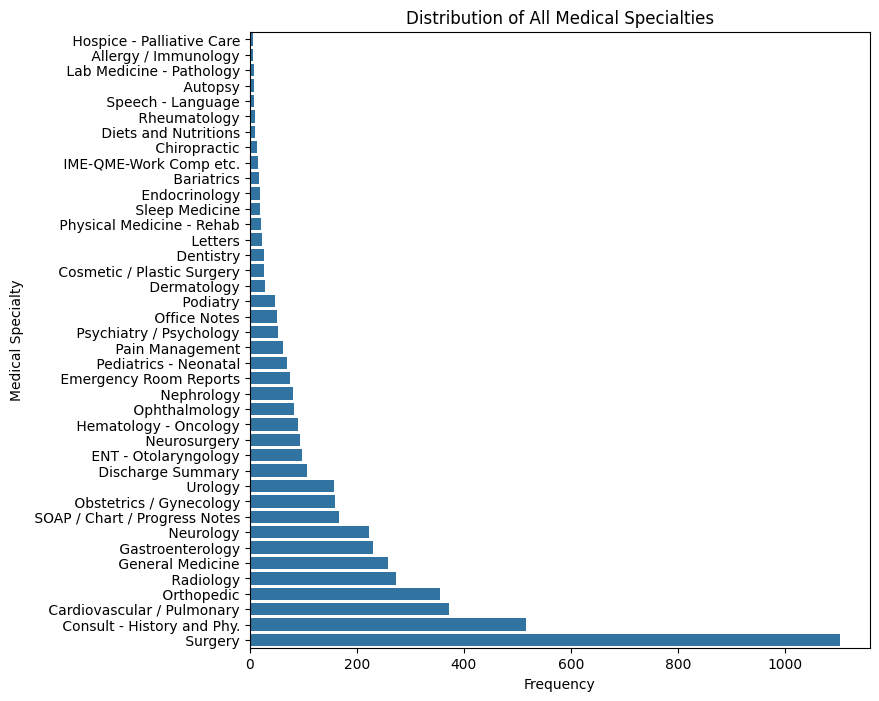

In [5]:
# Plot filtered distribution sorted by count
sorted_data = medical_specialty_categories['Medical_Specialty'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(8, 8))
sns.barplot(x=sorted_data.values, y=sorted_data.index)
plt.title('Distribution of All Medical Specialties')
plt.xlabel('Frequency')
plt.ylabel('Medical Specialty')
plt.show()

**Filtering and Displaying Medical Transcription Categories with More Than 70 Records:**   
 This code filters medical transcription categories to include only those with more than 70 records and then displays these categories along with their counts.

In [6]:
# Group data by medical specialty
medical_specialty_categories = medical_file.groupby('Medical_Specialty')

# Filter categories with more than 70 records
filtered_medical_specialty = medical_file.groupby('Medical_Specialty').filter(lambda x: x.shape[0] > 70)
filtered_medical_specialty_grouped = filtered_medical_specialty.groupby('Medical_Specialty')


# Get total number of filtered medical specialties and transcription samples
total_filtered_specialties = filtered_medical_specialty['Medical_Specialty'].nunique()
total_filtered_samples = len(filtered_medical_specialty)

print("Total number of filtered medical specialties: " + str(total_filtered_specialties))
print("Total number of filtered transcription samples: " + str(total_filtered_samples))

# Display the reduced categories
i = 1
print('============Filtered Medical Specialty ======================')
for catName, dataCategory in filtered_medical_specialty_grouped:
    print('Cat:' + str(i) + ' ' + catName + ' : ' + str(len(dataCategory)))
    i = i + 1

Total number of filtered medical specialties: 18
Total number of filtered transcription samples: 4444
============Filtered Medical Specialty ======================
Cat:1  Cardiovascular / Pulmonary : 372
Cat:2  Consult - History and Phy. : 516
Cat:3  Discharge Summary : 108
Cat:4  ENT - Otolaryngology : 98
Cat:5  Emergency Room Reports : 75
Cat:6  Gastroenterology : 230
Cat:7  General Medicine : 259
Cat:8  Hematology - Oncology : 90
Cat:9  Nephrology : 81
Cat:10  Neurology : 223
Cat:11  Neurosurgery : 94
Cat:12  Obstetrics / Gynecology : 160
Cat:13  Ophthalmology : 83
Cat:14  Orthopedic : 355
Cat:15  Radiology : 273
Cat:16  SOAP / Chart / Progress Notes : 166
Cat:17  Surgery : 1103
Cat:18  Urology : 158


Remove and Merge Specific Categories based on Domain Knowledge

In [7]:
# Strip whitespace from the Medical_Specialty column
filtered_medical_specialty['Medical_Specialty'] = filtered_medical_specialty['Medical_Specialty'].apply(lambda x: str.strip(x))

# Remove specific categories
categories_to_remove = [
    'Surgery', 'SOAP / Chart / Progress Notes', 'Office Notes',
    'Consult - History and Phy.', 'Emergency Room Reports',
    'Discharge Summary', 'Radiology', 'Pain Management',
    'General Medicine'
]

for category in categories_to_remove:
    mask = filtered_medical_specialty['Medical_Specialty'] == category
    filtered_medical_specialty = filtered_medical_specialty[~mask]

# Rename specific categories
filtered_medical_specialty.loc[filtered_medical_specialty['Medical_Specialty'] == 'Neurosurgery', 'Medical_Specialty'] = 'Neurology'
filtered_medical_specialty.loc[filtered_medical_specialty['Medical_Specialty'] == 'Nephrology', 'Medical_Specialty'] = 'Urology'

# Group the updated filtered data
filtered_medical_specialty_grouped = filtered_medical_specialty.groupby('Medical_Specialty')

# Get total number of filtered medical specialties and transcription samples
total_filtered_specialties = filtered_medical_specialty['Medical_Specialty'].nunique()
total_filtered_samples = len(filtered_medical_specialty)

print("Total number of filtered medical specialties: " + str(total_filtered_specialties))
print("Total number of filtered transcription samples: " + str(total_filtered_samples))

# Display the reduced categories with a heading
i = 1
print('============Filtered and Reduced Medical Specialties======================')
for catName, dataCategory in filtered_medical_specialty_grouped:
    print('Cat:' + str(i) + ' ' + catName + ' : ' + str(len(dataCategory)))
    i = i + 1


Total number of filtered medical specialties: 9
Total number of filtered transcription samples: 1944
============Filtered and Reduced Medical Specialties======================
Cat:1 Cardiovascular / Pulmonary : 372
Cat:2 ENT - Otolaryngology : 98
Cat:3 Gastroenterology : 230
Cat:4 Hematology - Oncology : 90
Cat:5 Neurology : 317
Cat:6 Obstetrics / Gynecology : 160
Cat:7 Ophthalmology : 83
Cat:8 Orthopedic : 355
Cat:9 Urology : 239


**Plotting Distribution of Filtered Medical Specialties:**   
This code generates a count plot to visualize the distribution of medical specialties after the total filtering

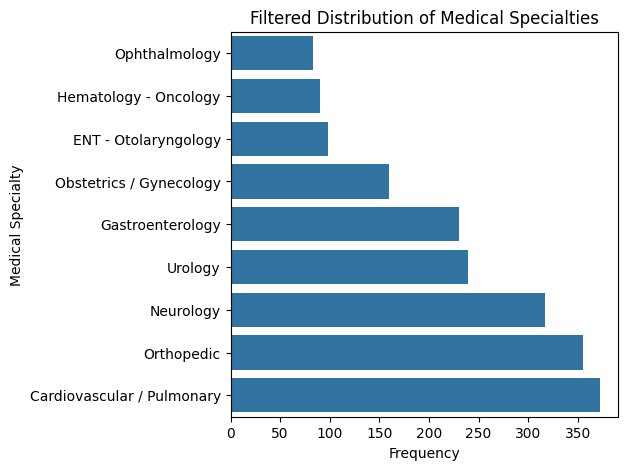

In [8]:
# Plot filtered distribution sorted by count
sorted_data = filtered_medical_specialty['Medical_Specialty'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(5, 5))
sns.barplot(x=sorted_data.values, y=sorted_data.index)
plt.title('Filtered Distribution of Medical Specialties')
plt.xlabel('Frequency')
plt.ylabel('Medical Specialty')
plt.show()


**Creating a Filtered DataFrame with Relevant Columns:**   
This script creates a new DataFrame data containing only the 'Transcription' and 'Medical_Specialty' columns from filtered_data_categories. It then drops rows where 'Transcription' is missing and displays the shape of the resulting DataFrame.

In [9]:
# Create a new DataFrame with only the relevant columns
medical_data = filtered_medical_specialty[['Transcription', 'Medical_Specialty']]

# Drop rows where 'Transcription' is missing
medical_data = medical_data.dropna(subset=['Transcription'])

# Display the shape of the resulting DataFrame
print("Shape of the data after dropping missing transcriptions:", medical_data.shape)
medical_data.head()

# Display a sample of the transcription text
print("Sample of the transcription text:")
print(medical_data.iloc[20]['Transcription'])

Shape of the data after dropping missing transcriptions: (1928, 2)
Sample of the transcription text:
PROCEDURE PERFORMED: , Umbilical hernia repair.,PROCEDURE:,  After informed consent was obtained, the patient was brought to the operative suite and placed supine on the operating table.  The patient was sedated, and an adequate local anesthetic was administered using 1% lidocaine without epinephrine.  The patient was prepped and draped in the usual sterile manner.,A standard curvilinear umbilical incision was made, and dissection was carried down to the hernia sac using a combination of Metzenbaum scissors and Bovie electrocautery.  The sac was cleared of overlying adherent tissue, and the fascial defect was delineated.  The fascia was cleared of any adherent tissue for a distance of 1.5 cm from the defect.  The sac was then placed into the abdominal cavity and the defect was closed primarily using simple interrupted 0 Vicryl sutures.  The umbilicus was then re-formed using 4-0 Vicryl 

# **TEXT PREPROCESSING**

In [10]:
# Function to handle negations
def handle_negations(text):
    text = re.sub(r"\b(?:not|no|never|n't)\b", 'NOT', text)
    return text

# Function to clean medical text
def clean_medical_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', ' ', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+|mailto:\S+', ' ', text)  # Remove URLs and emails
    text = re.sub(r'[\.\,\?\!\;\:\(\)\[\]\{\}\'\"\\\/]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'%', '', text)  # Remove percentage symbols
    text = contractions.fix(text)  # Expand contractions
    text = handle_negations(text)  # Handle negations
    return text


In [11]:
# Function to tokenize text
def tokenize_text(text: str):
    return word_tokenize(text)

# Function to remove stopwords from tokens
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

In [12]:
# Apply text preprocessing to medical data
processed_data = []

for index, row in medical_data.iterrows():
    transcription = row['Transcription']

    # Clean the text
    cleaned_text = clean_medical_text(transcription)

    # Tokenize the text
    tokens = tokenize_text(cleaned_text)

    # Remove stopwords
    tokens = remove_stopwords(tokens)

    # Lemmatize the tokens
    lemmatized_tokens = lemmatize_tokens(tokens)

    # Print a sample transcript after each preprocessing step
    if index == 20:  # Adjust the index as per requirement to print different samples
        print("Original Transcription:\n", transcription)
        print("Cleaned Text:\n", cleaned_text)
        print("Tokens:\n", tokens)
        print("Lemmatized Tokens:\n", lemmatized_tokens)

    processed_data.append({
        'Medical_Specialty': row['Medical_Specialty'],
        'Processed_Transcription': ' '.join(lemmatized_tokens)
    })

# Convert processed data into a DataFrame
processed_medical_data = pd.DataFrame(processed_data)

# Display the processed DataFrame
print("Processed medical data:")
processed_medical_data.head()

Original Transcription:
 INDICATION:,  Prostate Cancer.,TECHNIQUE:,  3.5 hours following the intravenous administration of 26.5 mCi of Technetium 99m MDP, the skeleton was imaged in the anterior and posterior projections.,FINDINGS:,  There is a focus of abnormal increased tracer activity overlying the right parietal region of the skull.  The uptake in the remainder of the skeleton is within normal limits.  The kidneys image normally.  There is increased activity in the urinary bladder suggesting possible urinary retention.,CONCLUSION:,1.  Focus of abnormal increased tracer activity overlying the right parietal region of the skull.  CT scanning of magnetic resonance imaging of the skull and brain could be done for further assessment if it is clinically indicated.,2.  There is probably some degree of urinary retention.,
Cleaned Text:
 indication prostate cancer technique   hours following the intravenous administration of   mci of technetium m mdp the skeleton was imaged in the anterior 

,Medical_Specialty,Processed_Transcription
0,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement left atrial ...
1,Cardiovascular / Pulmonary,left ventricular cavity size wall thickness ap...
2,Cardiovascular / Pulmonary,-d echocardiogram multiple view heart great ve...
3,Cardiovascular / Pulmonary,description normal cardiac chamber size normal...
4,Cardiovascular / Pulmonary,-d study mild aortic stenosis widely calcified...


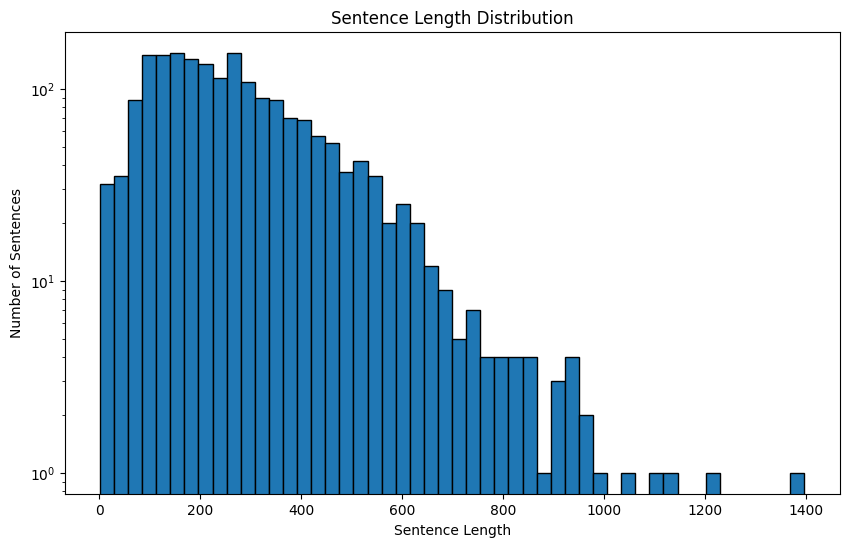

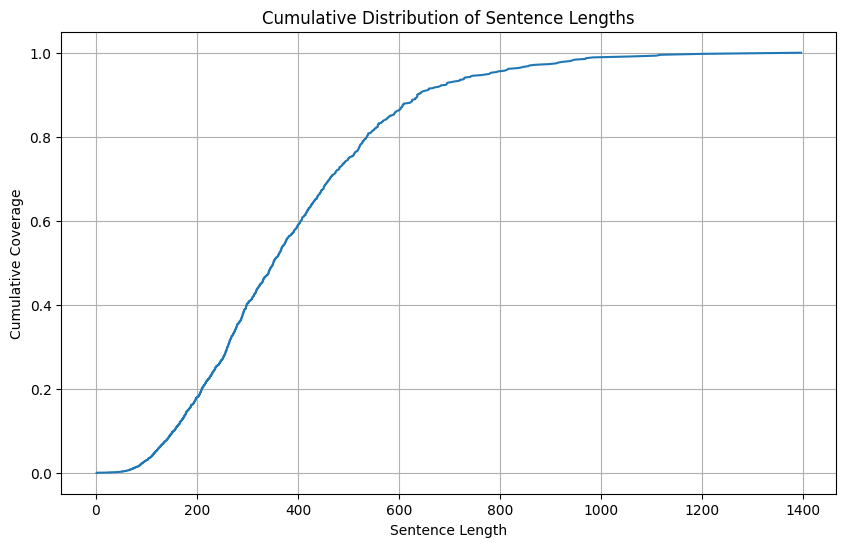

Selected sentence length for 90.0% coverage: 639


In [13]:
import numpy as np
# Analyze sentence length distribution
sentence_lengths = [len(sentence.split()) for sentence in processed_medical_data['Processed_Transcription']]
# Plot the sentence length distribution
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=50, edgecolor='black')
plt.yscale('log')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')
plt.show()

# Determine the coverage of different sentence lengths
sentence_lengths_sorted = np.sort(sentence_lengths)
cumulative_lengths = np.cumsum(sentence_lengths_sorted)
total_words = cumulative_lengths[-1]
coverage = cumulative_lengths / total_words

plt.figure(figsize=(10, 6))
plt.plot(sentence_lengths_sorted, coverage)
plt.title('Cumulative Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Cumulative Coverage')
plt.grid(True)
plt.show()

# Choose sentence length based on desired coverage
desired_coverage = 0.90
chosen_sent_len = sentence_lengths_sorted[np.argmax(coverage >= desired_coverage)]
print(f"Selected sentence length for {desired_coverage * 100}% coverage: {chosen_sent_len}")


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import describe

# Function to calculate descriptive statistics
def descriptive_statistics(data):
    desc_stats = describe(data)
    return {
        "Minimum": desc_stats.minmax[0],
        "25% Percentile": np.percentile(data, 25),
        "Median": np.median(data),
        "Mean": np.mean(data),
        "75% Percentile": np.percentile(data, 75),
        "Maximum": desc_stats.minmax[1],
        "Standard Deviation": np.std(data, ddof=1)
    }

# Calculating words and characters before and after cleaning
def word_count(text):
    return len(text.split())

def char_count(text):
    return len(text)

# Handling NaN values by replacing them with an empty string
medical_file['Transcription'] = medical_file['Transcription'].fillna('')
processed_medical_data['Processed_Transcription'] = processed_medical_data['Processed_Transcription'].fillna('')

# Original data (before cleaning)
original_word_counts = medical_file['Transcription'].apply(word_count)
original_char_counts = medical_file['Transcription'].apply(char_count)

# Cleaned data
cleaned_word_counts = processed_medical_data['Processed_Transcription'].apply(word_count)
cleaned_char_counts = processed_medical_data['Processed_Transcription'].apply(char_count)

# Calculate descriptive statistics for each case
stats_before_cleaning = {
    "Number of Words": descriptive_statistics(original_word_counts),
    "Number of Characters": descriptive_statistics(original_char_counts)
}

stats_after_cleaning = {
    "Number of Words": descriptive_statistics(cleaned_word_counts),
    "Number of Characters": descriptive_statistics(cleaned_char_counts)
}

# Create a DataFrame to display the statistics
stats_df = pd.DataFrame({
    "Descriptive Statistics": ["Minimum", "25% Percentile", "Median", "Mean", "75% Percentile", "Maximum", "Standard Deviation"],
    "Number of Words (Before Cleaning)": list(stats_before_cleaning["Number of Words"].values()),
    "Number of Words (After Cleaning)": list(stats_after_cleaning["Number of Words"].values()),
    "Number of Characters (Before Cleaning)": list(stats_before_cleaning["Number of Characters"].values()),
    "Number of Characters (After Cleaning)": list(stats_after_cleaning["Number of Characters"].values())
})

print(stats_df)


  Descriptive Statistics  Number of Words (Before Cleaning)  \
0                Minimum                           0.000000   
1         25% Percentile                         239.000000   
2                 Median                         397.000000   
3                   Mean                         462.376275   
4         75% Percentile                         614.000000   
5                Maximum                        3029.000000   
6     Standard Deviation                         317.585206   

   Number of Words (After Cleaning)  Number of Characters (Before Cleaning)  \
0                          1.000000                                0.000000   
1                        145.000000                             1590.500000   
2                        244.000000                             2659.000000   
3                        275.446058                             3032.165033   
4                        366.250000                             3995.000000   
5                    

# **MODEL TRAINING AND EVALUATION**

**Encoding Medical Specialties**

In [15]:
# Encoding Medical Specialties
y = pd.get_dummies(processed_medical_data['Medical_Specialty']).values
num_classes = y.shape[1]

In [16]:
# Train-Test Split
print("Splitting data into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(processed_medical_data['Processed_Transcription'], y, test_size=0.2, random_state=42, stratify=y)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Splitting data into training and test sets...
Training data shape: (1542,)
Test data shape: (386,)


**Loading Pre-trained Embeddings** (GloVe and BioWordVec)

Set Parameters

In [81]:
# Parameters
max_vocab = 3000  # Vocabulary size limit
embed_vec = 200   # Embedding vector size
sent_len = 300   # Maximum sentence length
dropout_rate = 0.3
epochs = 20
batch_size = 32

**Tokenize text data**

In [82]:
# Tokenize text data
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=sent_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=sent_len)

**Load and preprocess GloVe embeddings**

In [83]:
# Function to load embeddings
def load_embeddings(filepath, word_index, max_vocab, embed_vec):
    embeddings_index = {}
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    embedding_matrix = np.zeros((max_vocab, embed_vec))
    for word, i in word_index.items():
        if i < max_vocab:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector
    return embedding_matrix

embedding_file_path = '/content/drive/MyDrive/glove.6B/glove.6B.200d.txt'
embedding_matrix = load_embeddings(embedding_file_path, word_index, max_vocab, embed_vec)

# Embedding layer using pre-trained embeddings
embedding_layer = Embedding(input_dim=max_vocab, output_dim=embed_vec, weights=[embedding_matrix], input_length=sent_len, trainable=False)


In [84]:
import gensim

# Function to load BioWordVec embeddings from binary format
def load_gensim_bin_embeddings(filepath, word_index, max_vocab, embed_dim):
    embeddings_index = gensim.models.KeyedVectors.load_word2vec_format(filepath, binary=True)

    # Initialize the embedding matrix
    embedding_matrix = np.zeros((max_vocab, embed_dim), dtype=np.float16)

    # Populate the embedding matrix with vectors from the file
    for word, i in word_index.items():
        if i < max_vocab:
            if word in embeddings_index:
                embedding_vector = embeddings_index[word]
                if embedding_vector is not None:
                    embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Set the path for BioWordVec .bin file
biowordvec_filepath = '/content/drive/MyDrive/BioWordVec_PubMed_MIMICIII_d200.vec.bin'
embed_vec_biowordvec = 200  # BioWordVec embedding vector size

# Load the BioWordVec embeddings
biowordvec_embedding_matrix = load_gensim_bin_embeddings(biowordvec_filepath, word_index, max_vocab, embed_vec_biowordvec)

# Create BioWordVec embedding layer
biowordvec_embedding_layer = Embedding(input_dim=max_vocab,
                                       output_dim=embed_vec_biowordvec,
                                       weights=[biowordvec_embedding_matrix],
                                       input_length=sent_len,
                                       trainable=False)


**Model Definitions**

**LSTM Model**

In [85]:
lstm_model = Sequential([
    embedding_layer,
    LSTM(100, dropout=dropout_rate, recurrent_dropout=0.2),
    Dense(num_classes, activation='softmax')
])
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**LSTM Model with BioWordVec**

In [86]:
# LSTM Model with BioWordVec
lstm_model_biowordvec = Sequential([
    biowordvec_embedding_layer,
    LSTM(100, dropout=dropout_rate, recurrent_dropout=0.2),
    Dense(num_classes, activation='softmax')
])
lstm_model_biowordvec.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**GRU Model**

In [87]:
gru_model = Sequential([
    embedding_layer,
    GRU(100, dropout=dropout_rate, recurrent_dropout=0.2),
    Dense(num_classes, activation='softmax')
])
gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**GRU Model with BioWordVec**

In [88]:
# GRU Model with BioWordVec
gru_model_biowordvec = Sequential([
    biowordvec_embedding_layer,
    GRU(100, dropout=dropout_rate, recurrent_dropout=0.2),
    Dense(num_classes, activation='softmax')
])
gru_model_biowordvec.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**CNN Model**

In [89]:
cnn_model = Sequential([
    embedding_layer,
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(dropout_rate),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


**CNN Model with BioWordVec**

In [90]:
# CNN Model with BioWordVec
cnn_model_biowordvec = Sequential([
    biowordvec_embedding_layer,
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(dropout_rate),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])
cnn_model_biowordvec.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Evaluation Functions**

In [91]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

def calculate_roc_auc(y_true, y_pred_prob, n_classes):
    if n_classes == 2:
        auc = roc_auc_score(y_true, y_pred_prob[:, 1])
    else:
        auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr')
    return auc

def evaluate_model(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} Model Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    plot_confusion_matrix(y_true, y_pred, model_name)

    return accuracy, precision, recall, f1

**Train and evaluate LSTM model**

Epoch 1/20
49/49 [==============================] - 16s 257ms/step - loss: 2.0423 - accuracy: 0.2218
Epoch 2/20
49/49 [==============================] - 13s 256ms/step - loss: 1.7334 - accuracy: 0.3872
Epoch 3/20
49/49 [==============================] - 13s 255ms/step - loss: 1.9135 - accuracy: 0.3359
Epoch 4/20
49/49 [==============================] - 12s 253ms/step - loss: 1.7511 - accuracy: 0.4021
Epoch 5/20
49/49 [==============================] - 12s 251ms/step - loss: 1.4831 - accuracy: 0.4877
Epoch 6/20
49/49 [==============================] - 12s 253ms/step - loss: 1.2623 - accuracy: 0.5525
Epoch 7/20
49/49 [==============================] - 12s 255ms/step - loss: 1.1771 - accuracy: 0.5947
Epoch 8/20
49/49 [==============================] - 13s 259ms/step - loss: 1.0387 - accuracy: 0.6537
Epoch 9/20
49/49 [==============================] - 28s 582ms/step - loss: 1.1058 - accuracy: 0.6278
Epoch 10/20
49/49 [==============================] - 30s 604ms/step - loss: 1.0609 - accura

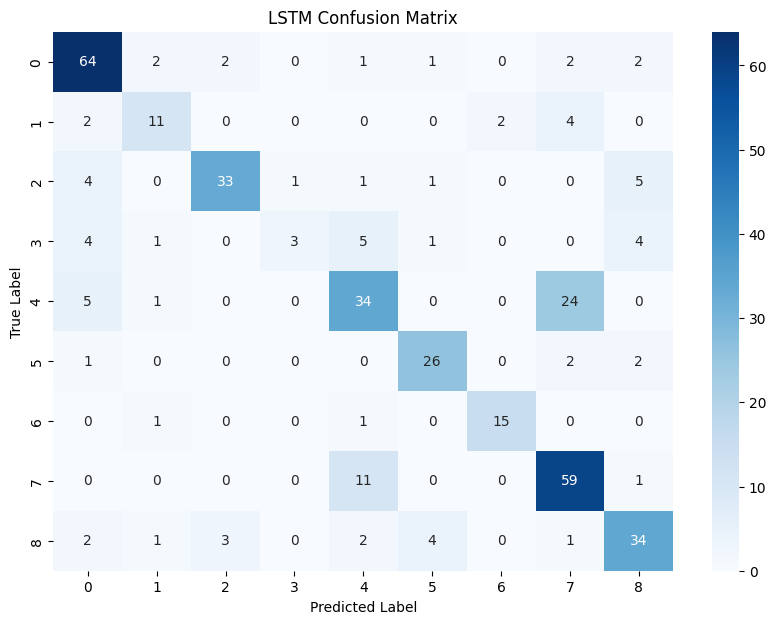

In [92]:
# Train and evaluate LSTM model
start_time = time.time()
lstm_model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
training_time = time.time() - start_time
print(f"LSTM Model Training Time: {training_time} seconds")
lstm_metrics_glove = evaluate_model(lstm_model, X_test_pad, y_test, "LSTM") + (training_time,)


Training LSTM Model with BioWordVec Embeddings
Epoch 1/20
49/49 [==============================] - 20s 334ms/step - loss: 2.0123 - accuracy: 0.2451
Epoch 2/20
49/49 [==============================] - 16s 320ms/step - loss: 1.6955 - accuracy: 0.3975
Epoch 3/20
49/49 [==============================] - 17s 355ms/step - loss: 1.6709 - accuracy: 0.4306
Epoch 4/20
49/49 [==============================] - 19s 391ms/step - loss: 1.4048 - accuracy: 0.5227
Epoch 5/20
49/49 [==============================] - 18s 363ms/step - loss: 1.1976 - accuracy: 0.5772
Epoch 6/20
49/49 [==============================] - 15s 300ms/step - loss: 1.2526 - accuracy: 0.5707
Epoch 7/20
49/49 [==============================] - 14s 288ms/step - loss: 1.0366 - accuracy: 0.6518
Epoch 8/20
49/49 [==============================] - 13s 271ms/step - loss: 0.9248 - accuracy: 0.6874
Epoch 9/20
49/49 [==============================] - 14s 290ms/step - loss: 0.9731 - accuracy: 0.6667
Epoch 10/20
49/49 [=========================

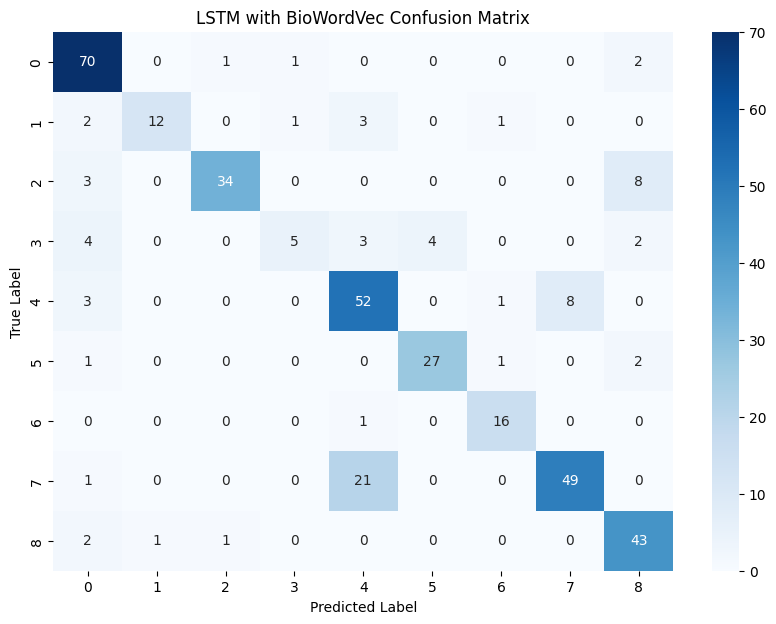

In [93]:
print("Training LSTM Model with BioWordVec Embeddings")
start_time = time.time()
lstm_model_biowordvec.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
training_time_biowordvec = time.time() - start_time
print(f"LSTM Model with BioWordVec Training Time: {training_time_biowordvec} seconds")
lstm_metrics_biowordvec = evaluate_model(lstm_model_biowordvec, X_test_pad, y_test, "LSTM with BioWordVec") + (training_time_biowordvec,)


**Train and evaluate GRU model**

Epoch 1/20
49/49 [==============================] - 18s 305ms/step - loss: 2.0722 - accuracy: 0.2043
Epoch 2/20
49/49 [==============================] - 15s 310ms/step - loss: 1.9138 - accuracy: 0.2970
Epoch 3/20
49/49 [==============================] - 16s 318ms/step - loss: 1.7805 - accuracy: 0.3690
Epoch 4/20
49/49 [==============================] - 15s 302ms/step - loss: 1.5363 - accuracy: 0.4669
Epoch 5/20
49/49 [==============================] - 14s 283ms/step - loss: 1.2736 - accuracy: 0.5512
Epoch 6/20
49/49 [==============================] - 14s 284ms/step - loss: 1.1338 - accuracy: 0.5999
Epoch 7/20
49/49 [==============================] - 13s 266ms/step - loss: 1.0733 - accuracy: 0.6122
Epoch 8/20
49/49 [==============================] - 13s 264ms/step - loss: 0.9176 - accuracy: 0.6783
Epoch 9/20
49/49 [==============================] - 13s 264ms/step - loss: 0.8050 - accuracy: 0.7160
Epoch 10/20
49/49 [==============================] - 14s 286ms/step - loss: 0.7374 - accura

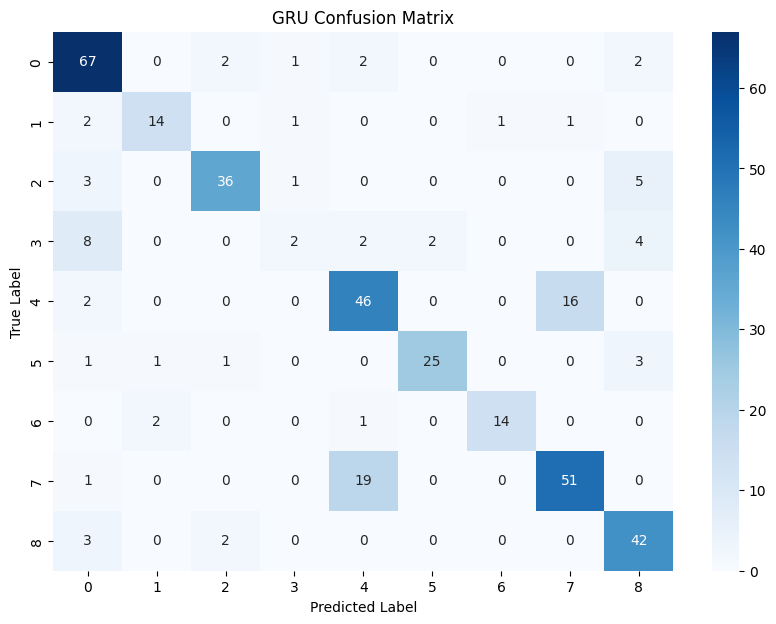

In [94]:
# Train and evaluate GRU model
start_time = time.time()
gru_model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
training_time = time.time() - start_time
print(f"GRU Model Training Time: {training_time} seconds")
gru_metrics_glove = evaluate_model(gru_model, X_test_pad, y_test, "GRU") + (training_time,)


Training GRU Model with BioWordVec Embeddings
Epoch 1/20
49/49 [==============================] - 15s 254ms/step - loss: 2.0320 - accuracy: 0.2263
Epoch 2/20
49/49 [==============================] - 12s 251ms/step - loss: 1.8600 - accuracy: 0.3294
Epoch 3/20
49/49 [==============================] - 12s 252ms/step - loss: 1.6490 - accuracy: 0.4345
Epoch 4/20
49/49 [==============================] - 13s 255ms/step - loss: 1.4619 - accuracy: 0.4968
Epoch 5/20
49/49 [==============================] - 13s 255ms/step - loss: 1.2073 - accuracy: 0.5694
Epoch 6/20
49/49 [==============================] - 13s 256ms/step - loss: 1.0365 - accuracy: 0.6362
Epoch 7/20
49/49 [==============================] - 12s 247ms/step - loss: 0.9141 - accuracy: 0.6958
Epoch 8/20
49/49 [==============================] - 12s 249ms/step - loss: 0.7766 - accuracy: 0.7393
Epoch 9/20
49/49 [==============================] - 12s 254ms/step - loss: 0.6824 - accuracy: 0.7730
Epoch 10/20
49/49 [==========================

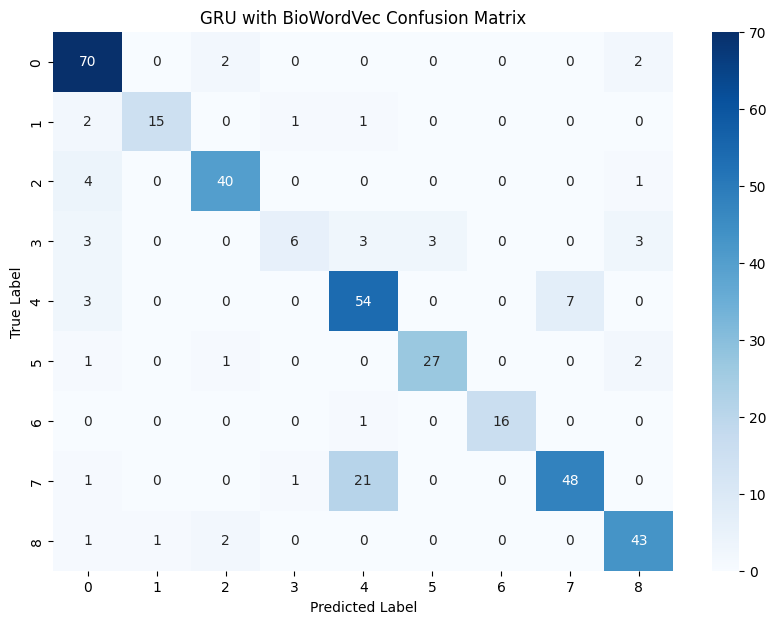

In [95]:
print("Training GRU Model with BioWordVec Embeddings")
start_time = time.time()
gru_model_biowordvec.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
training_time_biowordvec_gru = time.time() - start_time
print(f"GRU Model with BioWordVec Training Time: {training_time_biowordvec_gru} seconds")
gru_metrics_biowordvec = evaluate_model(gru_model_biowordvec, X_test_pad, y_test, "GRU with BioWordVec") + (training_time_biowordvec_gru,)

**Train and evaluate CNN model**

Epoch 1/20
49/49 [==============================] - 4s 48ms/step - loss: 2.4509 - accuracy: 0.1135
Epoch 2/20
49/49 [==============================] - 2s 50ms/step - loss: 1.9473 - accuracy: 0.2789
Epoch 3/20
49/49 [==============================] - 3s 55ms/step - loss: 1.4673 - accuracy: 0.4870
Epoch 4/20
49/49 [==============================] - 2s 47ms/step - loss: 0.9093 - accuracy: 0.7134
Epoch 5/20
49/49 [==============================] - 2s 46ms/step - loss: 0.5513 - accuracy: 0.8184
Epoch 6/20
49/49 [==============================] - 2s 47ms/step - loss: 0.4053 - accuracy: 0.8807
Epoch 7/20
49/49 [==============================] - 2s 47ms/step - loss: 0.3406 - accuracy: 0.8911
Epoch 8/20
49/49 [==============================] - 3s 52ms/step - loss: 0.2666 - accuracy: 0.9086
Epoch 9/20
49/49 [==============================] - 3s 55ms/step - loss: 0.2550 - accuracy: 0.9092
Epoch 10/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2336 - accuracy: 0.9066
Epoch 11/

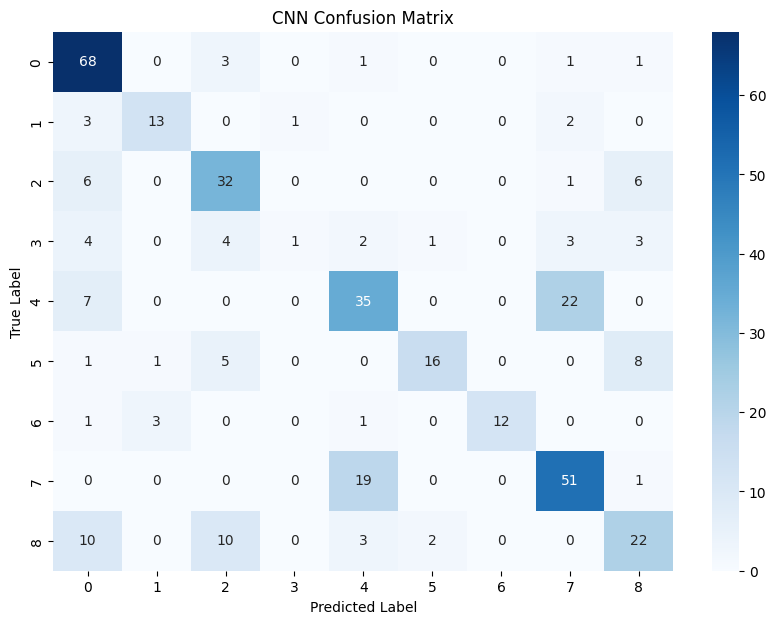

In [96]:
# Train and evaluate CNN model
start_time = time.time()
cnn_model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
training_time = time.time() - start_time
print(f"CNN Model Training Time: {training_time} seconds")
cnn_metrics_glove = evaluate_model(cnn_model, X_test_pad, y_test, "CNN") + (training_time,)

Training CNN Model with BioWordVec Embeddings
Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 2.0898 - accuracy: 0.2458
Epoch 2/20
49/49 [==============================] - 2s 46ms/step - loss: 1.4000 - accuracy: 0.5019
Epoch 3/20
49/49 [==============================] - 2s 46ms/step - loss: 0.9693 - accuracy: 0.6796
Epoch 4/20
49/49 [==============================] - 2s 47ms/step - loss: 0.6256 - accuracy: 0.7964
Epoch 5/20
49/49 [==============================] - 3s 53ms/step - loss: 0.4662 - accuracy: 0.8547
Epoch 6/20
49/49 [==============================] - 3s 52ms/step - loss: 0.4271 - accuracy: 0.8677
Epoch 7/20
49/49 [==============================] - 2s 46ms/step - loss: 0.3132 - accuracy: 0.8969
Epoch 8/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2678 - accuracy: 0.9060
Epoch 9/20
49/49 [==============================] - 2s 47ms/step - loss: 0.2372 - accuracy: 0.9144
Epoch 10/20
49/49 [==============================] - 2s 47ms/st

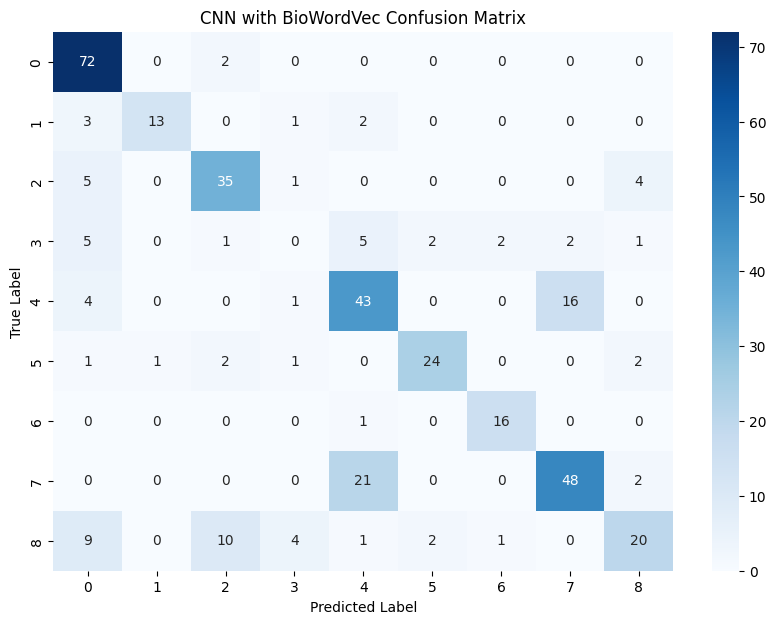

In [97]:
print("Training CNN Model with BioWordVec Embeddings")
start_time = time.time()
cnn_model_biowordvec.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
training_time_biowordvec_cnn = time.time() - start_time
print(f"CNN Model with BioWordVec Training Time: {training_time_biowordvec_cnn} seconds")
cnn_metrics_biowordvec = evaluate_model(cnn_model_biowordvec, X_test_pad, y_test, "CNN with BioWordVec") + (training_time_biowordvec_cnn,)

**BERT Model Preparation and Training**

In [102]:
# BERT Model Preparation and Training
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [103]:
# Tokenize the BERT dataset
input_ids = []
attention_masks = []

for text in processed_medical_data['Processed_Transcription']:
    encoded_dict = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [104]:
# Convert lists to tensors for BERT
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(np.argmax(y, axis=1))

In [105]:
# Split the data into training and validation sets for BERT
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, test_size=0.1, random_state=42)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.1, random_state=42)


In [106]:
# Create DataLoader for training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

In [107]:
# Create DataLoader for validation set
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=32)


In [108]:
# Define the optimizer and scheduler for BERT
optimizer = AdamW(bert_model.parameters(), lr=2e-5, eps=1e-8)
bertepochs = 5
total_steps = len(train_dataloader) * bertepochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [109]:
# Move BERT model to device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bert_model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [110]:
# Training loop for BERT
bert_model.train()
start_time = time.time()

for epoch in range(bertepochs):
    print(f'======== Epoch {epoch + 1} / {bertepochs} ========')
    print('Training...')

    total_train_loss = 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        optimizer.zero_grad()

        outputs = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(bert_model.parameters(), max_norm=1.0)

        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f'Average training loss: {avg_train_loss}')

training_time = time.time() - start_time
print(f"BERT Model Training Time: {training_time} seconds")

======== Epoch 1 / 5 ========
Training...
Average training loss: 1.9228378859433262
======== Epoch 2 / 5 ========
Training...
Average training loss: 1.114201003854925
======== Epoch 3 / 5 ========
Training...
Average training loss: 0.7053039572455666
======== Epoch 4 / 5 ========
Training...
Average training loss: 0.539443748105656
======== Epoch 5 / 5 ========
Training...
Average training loss: 0.4745802573182366
BERT Model Training Time: 2972.7972717285156 seconds


In [112]:
# Evaluation on validation set
bert_model.eval()
total_eval_accuracy = 0
total_eval_loss = 0
all_labels = []
all_preds = []

for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = bert_model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)

    loss = outputs.loss
    total_eval_loss += loss.item()

    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).flatten()
    total_eval_accuracy += (preds == b_labels).cpu().numpy().mean()
    all_labels.extend(b_labels.cpu().numpy())
    all_preds.extend(preds.cpu().numpy())

avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
avg_val_loss = total_eval_loss / len(validation_dataloader)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')


print(f'Validation Accuracy: {avg_val_accuracy}')
print(f'Validation Loss: {avg_val_loss}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

bert_metrics = (avg_val_accuracy, precision, recall, f1, training_time)

Validation Accuracy: 0.8303571428571429
Validation Loss: 0.49167832146797863
Precision: 0.8072698376709461
Recall: 0.8031088082901554
F1 Score: 0.7916414705580227


In [100]:
model_names = [
    'LSTM (GloVe)', 'LSTM (BioWordVec)',
    'GRU (GloVe)', 'GRU (BioWordVec)',
    'CNN (GloVe)', 'CNN (BioWordVec)',
    'BERT'
]

all_metrics = [
    lstm_metrics_glove, lstm_metrics_biowordvec,
    gru_metrics_glove, gru_metrics_biowordvec,
    cnn_metrics_glove, cnn_metrics_biowordvec,
    bert_metrics
]

metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time']

# Print metrics for each model
for i, model_name in enumerate(model_names):
    print(f"\n{model_name} Model Metrics:")
    for j, metric in enumerate(all_metrics[i]):
        if j < len(metric_names):
            print(f"{metric_names[j]}: {metric}")



LSTM (GloVe) Model Metrics:
Accuracy: 0.7227979274611399
Precision: 0.7265319086182723
Recall: 0.7227979274611399
F1 Score: 0.7119717360336598
Training Time: 335.9987189769745

LSTM (BioWordVec) Model Metrics:
Accuracy: 0.7979274611398963
Precision: 0.8096766323290127
Recall: 0.7979274611398963
F1 Score: 0.7915437065453258
Training Time: 307.43129539489746

GRU (GloVe) Model Metrics:
Accuracy: 0.7694300518134715
Precision: 0.7628893080832133
Recall: 0.7694300518134715
F1 Score: 0.7594376845263604
Training Time: 283.65781807899475

GRU (BioWordVec) Model Metrics:
Accuracy: 0.8264248704663213
Precision: 0.8340537922658465
Recall: 0.8264248704663213
F1 Score: 0.8212907947873033
Training Time: 264.9618573188782

CNN (GloVe) Model Metrics:
Accuracy: 0.6476683937823834
Precision: 0.6498048322792721
Recall: 0.6476683937823834
F1 Score: 0.6312472595616712
Training Time: 50.095582246780396

CNN (BioWordVec) Model Metrics:
Accuracy: 0.7020725388601037
Precision: 0.6880752432200776
Recall: 0.702

<Figure size 1400x700 with 0 Axes>

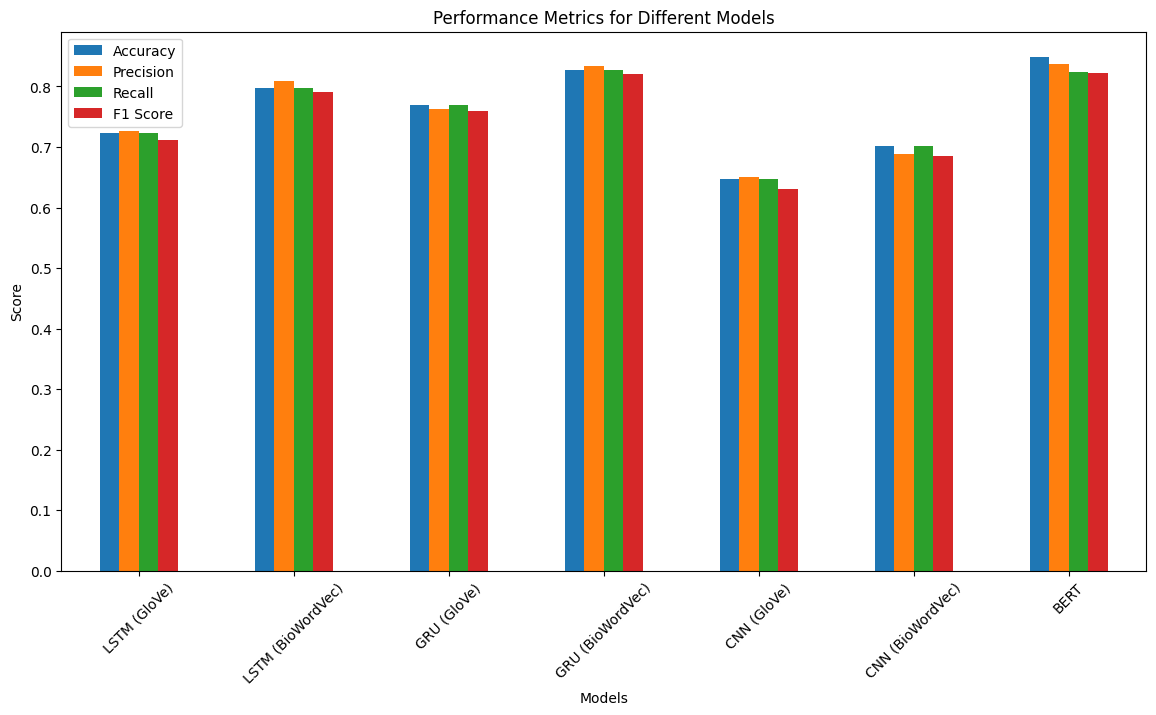

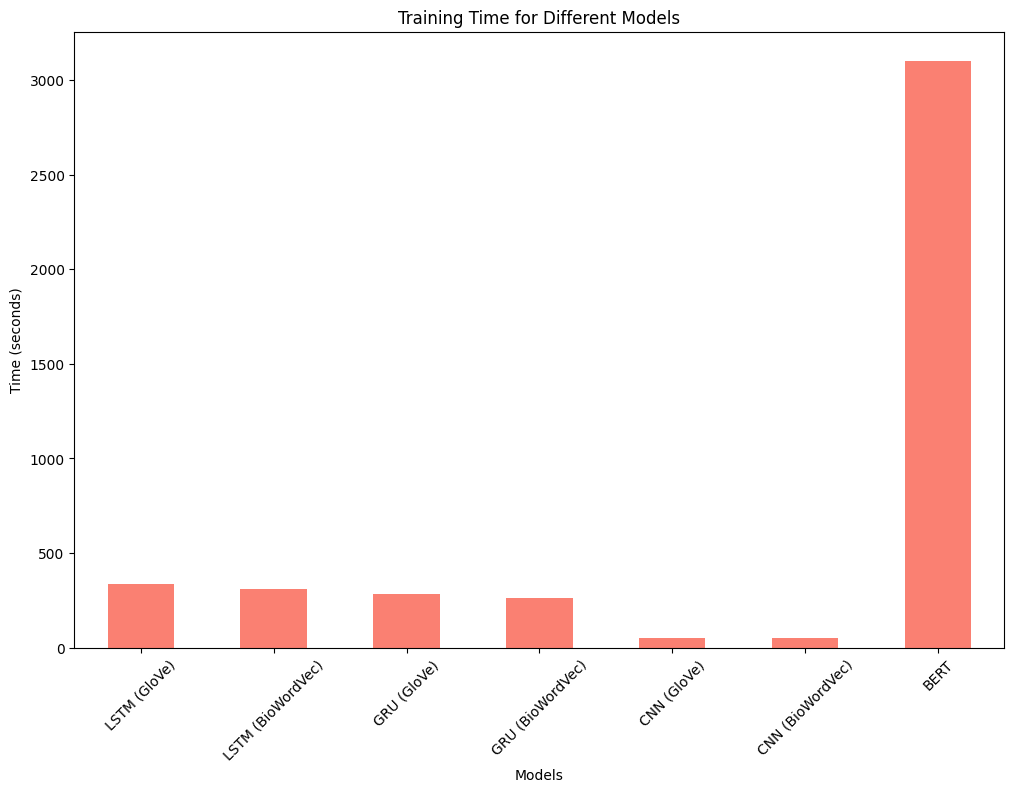

In [113]:
# Create a DataFrame for easy plotting
metrics_df = pd.DataFrame(all_metrics, columns=metric_names, index=model_names)

# Plotting the performance metrics
plt.figure(figsize=(14, 7))
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(kind='bar', figsize=(14, 7))
plt.title('Performance Metrics for Different Models')
plt.ylabel('Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12, 8))
metrics_df['Training Time'].plot(kind='bar', color='salmon')
plt.title('Training Time for Different Models')
plt.ylabel('Time (seconds)')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()